In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import pprint

In [2]:
def sfun(string):
    _,date = string.split('-',1)
    return datetime.strptime(date,"%Y%m%d-%H%M%S")

def lExp(l):
    l2 = list()
    for f in l:
        name,date = f.split('-',1)
        l2.append((name,datetime.strptime(date,"%Y%m%d-%H%M%S"),f))
    return l2


def import_data(name,path=['emg_data','ipa_emg']):
    fList = [f for f in os.listdir(os.path.join(os.path.expanduser('~'),*path)) if not f.startswith('.') and not os.path.isdir(f)]
    l2 = lExp(sorted(fList,key=sfun))
    return [pd.read_csv(os.path.join(os.path.expanduser('~'),*path,f[-1]), skiprows=1, header=None, delim_whitespace=True) for f in l2  if f[0] == name]




In [3]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.layouts import column, row
from bokeh.palettes import Spectral11, Category20, Set1
from bokeh.models import Range1d
output_notebook()

def plotdf(dfs, numlines=None,pltflag=None):
    # if just one pandas frame is given
    try:
        # get number of plottable columns if no exlicit numbers to plot are given
        if numlines == None:
            numlines = list(range(0,len(dfs.columns)))
        
        # create cut down color palette
        mypalette = [Set1[len(dfs.columns)][i] for i in numlines]
        
        # Only one plot
        if pltflag == None:
            p = figure()
            p.multi_line(xs = [dfs.index.values] *len(numlines),
                         ys = [dfs[n].values for n,i in enumerate(dfs) if i in numlines],
                         line_color = mypalette
                        )
            show(p)
            
        # Combined Plot
        elif pltflag == 'columns':
            pH = int(800/len(numlines))
            plist = [figure(plot_height=pH, y_range=Range1d(dfs.values.min(),dfs.values.max()), title=str(f)) for f in numlines]
            for i,p in enumerate(plist):
                p.line( x = dfs.index.values,
                        y = dfs[numlines[i]].values,
                        line_color = mypalette[i])
            show(column(*plist))
    
    # If list of emg data is given
    except:
        print('except')
        if numlines == None:
            numlines = list(range(0,len(dfs[0].columns)))
        
        # create cut down color palette
        mypalette = [Set1[len(dfs[0].columns)][i] for i in numlines]
        
        pH = int(800/len(numlines))
        yranges = Range1d(min([f.values.min() for f in dfs]),max([f.values.max() for f in dfs]))
        xranges = Range1d(min([f.index.values.min() for f in dfs]),max([f.index.values.max() for f in dfs]))
        plist = [figure(plot_height=pH, y_range=yranges, x_range=xranges, title=str(f)) for f in numlines]
        for i,p in enumerate(plist):
            p.multi_line( xs =[f.index.values for f in dfs],
                          ys = [f[numlines[i]].values for f in dfs],
                          line_color = mypalette[i])
        show(column(*plist))
            


Loading BokehJS ...

In [4]:
dic = { 1: 'Tasse aufnehmen', 
        2: 'Tasse halten',
        3: 'Tasse abstellen',
        4: 'Tasse hoch&runter',
        8: 'Ruhe (Supination)',
        9: 'Ruhe (Pronation)'
      }
its = ['cupv1','cupv2']
feed_dic = dict()
feed_dic['cupsv1'] = 5
name = its[0]
feed_dic[name] = [5,1]
feed_dic

{'cupsv1': 5, 'cupv1': [5, 1]}

In [5]:
a = import_data('cupv1_1',path=['emg_data','ipa_emg','lifting_cup_20170607'])

In [6]:
feed_dic = dict()
for n in its:
    l2 = list()
    for i in dic:
         l2.append((i,import_data(n+'_'+str(i),path=['emg_data','ipa_emg','lifting_cup_20170607'])))
    feed_dic[n] = l2

In [7]:
mxx = 0
count = 0
for i in feed_dic:
    print('now in ', i)
    for i,k in enumerate(feed_dic[i]):
        print('--> with number ',i, ' which has ', len(k[1]))
        if len(k[1]) > 0:
            mx2 = max([max(m.max()) for m in k[1]])
            count += 1
            if mx2 > mxx:
                mxx = mx2
        else:
            print('passing...')
        
print(mxx)
print(count)

now in  cupv1
--> with number  0  which has  8
--> with number  1  which has  8
--> with number  2  which has  8
--> with number  3  which has  0
passing...
--> with number  4  which has  2
--> with number  5  which has  2
now in  cupv2
--> with number  0  which has  7
--> with number  1  which has  7
--> with number  2  which has  7
--> with number  3  which has  1
--> with number  4  which has  2
--> with number  5  which has  2
771
11


In [8]:
feed_dic.keys()

dict_keys(['cupv1', 'cupv2'])

In [54]:
gesture = 5
print(dic[feed_dic[its[1]][gesture-1][0]])
plotdf(feed_dic[its[1]][gesture-1][1])

Ruhe (Supination)
except


In [10]:
from keras.layers.convolutional import Conv1D
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LocallyConnected2D
from keras.layers import Conv2D, MaxPooling2D, LSTM
from keras.layers.normalization import BatchNormalization
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot



Using TensorFlow backend.


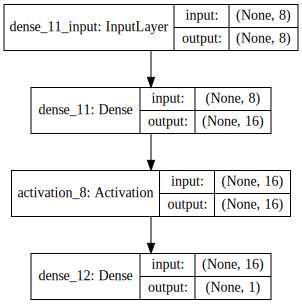

In [75]:
model = Sequential()
model.add(Dense(16,input_shape=(8,)))
model.add(Activation('relu'))
#model.add(Dense(16))
#model.add(Activation('relu'))
#model.add(Dense(16))
#model.add(Activation('relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], class_mode="binary" )
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                144       
_________________________________________________________________
activation_7 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 161.0
Trainable params: 161.0
Non-trainable params: 0.0
_________________________________________________________________


In [67]:
# prep data:

x = list()
y = list()
for f in its:
    for k in feed_dic[f]:
        if k[1]:
            a = np.concatenate([np.array(i) for i in k[1] ], axis= 0 )
            b = np.resize(np.array(k[0]), (a.shape[0],1))
            x.append(a)
            y.append(b)

y = np.concatenate(y)
x = np.concatenate(x)
print(x.shape)

(11824, 8)


In [68]:
# prep data further
x_cut = x[ np.in1d(y[:,0], (2,4,8,9)) ]
y_cut = y[ np.in1d(y[:,0], (2,4,8,9)) ]
y_cut[ np.in1d(y_cut[:,0], (2,4) ) ] = 1
y_cut[ np.in1d(y_cut[:,0], (8,9) ) ] = 0

#from keras.utils.np_utils import to_categorical
#y_cut_binary = to_categorical(y_cut)
y_cut_binary = y_cut

split_size = int(x_cut.shape[0]*0.1)

y_cut_train, y_cut_test = y_cut_binary[split_size:], y_cut_binary[:split_size]
x_cut_train, x_cut_test = x_cut[split_size:], x_cut[:split_size]

print(x_cut_train.shape)
print(y_cut_train)

(6592, 8)
[[1]
 [1]
 [1]
 ..., 
 [0]
 [0]
 [0]]


In [69]:
model.fit(x_cut_train,y_cut_train,epochs = 50, batch_size = 100, validation_split=0.2, shuffle=True)

/home/myo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2094: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 5273 samples, validate on 1319 samples
Epoch 1/50
5273/5273 [==============================] - 0s - loss: 0.0955 - acc: 0.9892 - val_loss: 0.0145 - val_acc: 0.9985
Epoch 2/50
5273/5273 [==============================] - 0s - loss: 0.0775 - acc: 0.9917 - val_loss: 0.0134 - val_acc: 0.9985
Epoch 3/50
5273/5273 [==============================] - 0s - loss: 0.0618 - acc: 0.9934 - val_loss: 0.0088 - val_acc: 0.9985
Epoch 4/50
5273/5273 [==============================] - 0s - loss: 0.0547 - acc: 0.9953 - val_loss: 0.0122 - val_acc: 0.9985
Epoch 5/50
5273/5273 [==============================] - 0s - loss: 0.0499 - acc: 0.9958 - val_loss: 0.0112 - val_acc: 0.9977
Epoch 6/50
5273/5273 [==============================] - 0s - loss: 0.0386 - acc: 0.9966 - val_loss: 0.0156 - val_acc: 0.9947
Epoch 7/50
5273/5273 [==============================] - 0s - loss: 0.0254 - acc: 0.9972 - val_loss: 0.0128 - val_acc: 0.9955
Epoch 8/50
5273/5273 [==============================] - 0s - loss: 0.0250 - a

In [70]:
scores = model.evaluate(x_cut_test, y_cut_test, batch_size=10)

700/732 [===========================>..] - ETA: 0s

In [72]:
print(model.metrics_names)
print(scores)

['loss', 'acc']
[2.3549161963744846e-07, 1.0]


In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                144       
_________________________________________________________________
activation_7 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 161.0
Trainable params: 161.0
Non-trainable params: 0.0
_________________________________________________________________


In [77]:
model.save("/home/myo/models/v1.h5")

In [79]:
from keras.models import load_model
m2 = load_model("/home/myo/models/v1.h5")

In [97]:
np.array?

In [102]:
kk = list(range(0,8))
np.array(kk,ndmin=2).shape

(1, 8)

In [104]:
r2d2 = m2.predict(np.array(kk,ndmin=2))

In [108]:
print(np.squeeze(r2d2))

0.738821268081665


In [110]:
np.mean(kk)

3.5